<a href="https://colab.research.google.com/github/yumkim1016/TP1/blob/main/Regression_minmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[회귀모델] MINMAX SCALING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('reg_minmax.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex_Encoded     4015 non-null   int64  
 1   Length          4015 non-null   float64
 2   Diameter        4015 non-null   float64
 3   Height          4015 non-null   float64
 4   Whole weight    4015 non-null   float64
 5   Shucked weight  4015 non-null   float64
 6   Viscera weight  4015 non-null   float64
 7   Shell weight    4015 non-null   float64
 8   Volume          4015 non-null   float64
 9   Density         4015 non-null   float64
 10  Rings           4015 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 345.2 KB


### Feature importance / heatmap

In [ ]:
# Feature Importance

features = df[df.columns[:-1]]
target = df['Rings']

# 랜덤 포레스트 분류기 모델 생성
rf = RandomForestClassifier(random_state=42)
rf.fit(features, target)

# Feature importance 계산
importances = rf.feature_importances_

# 결과 출력
for feature, importance in zip(features.columns, importances):
    print(f'{feature}: {importance}')

Sex_Encoded: 0.034367103340249616
Length: 0.08622005158186995
Diameter: 0.08621962338897862
Height: 0.07083800870627091
Whole weight: 0.11536386074625969
Shucked weight: 0.12743782977289195
Viscera weight: 0.12061984988577822
Shell weight: 0.12558623665724314
Volume: 0.11661606768917451
Density: 0.11673136823128347


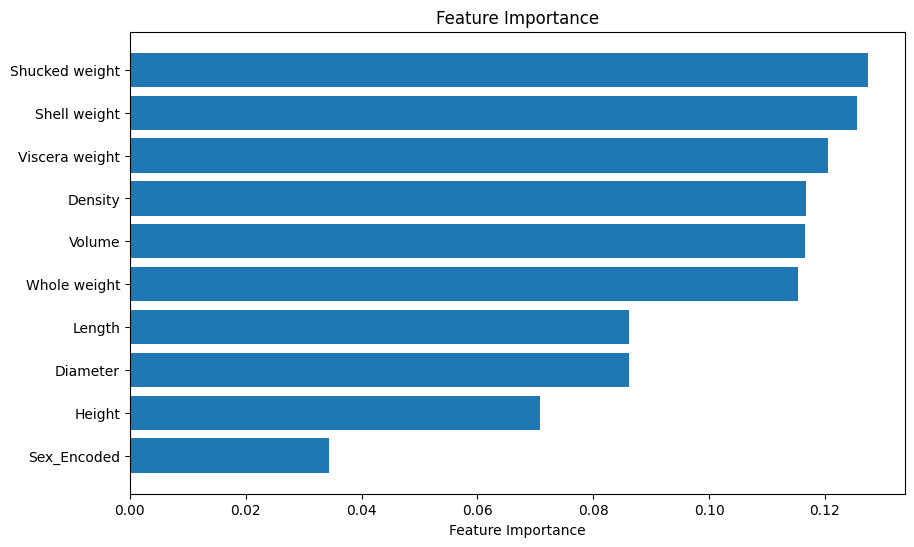

In [ ]:
# bar plot으로 결과 시각화, 높은순서대로 표시

feature_names = features.columns
sorted_indices = np.argsort(importances)
pos = np.arange(sorted_indices.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_indices], align='center')
plt.yticks(pos, feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

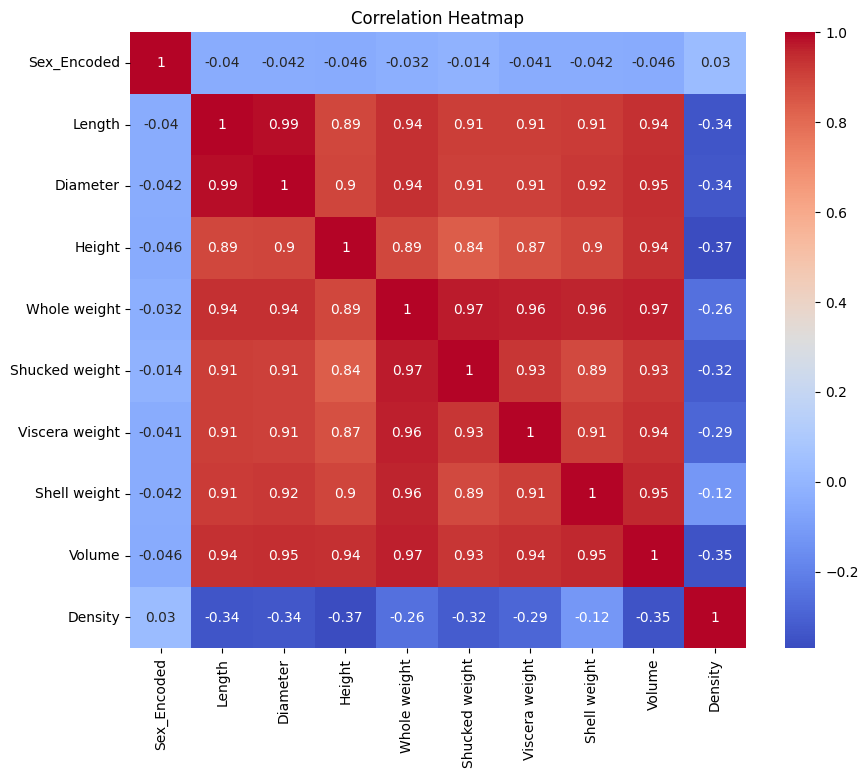

In [ ]:
# Heatmap

# 상관관계 계산
correlation_matrix = features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 가장 연관성 없어보이는 Sex_Encoded, Density features drop
reg_minmax_fi = df.drop('Density', axis=1)
reg_minmax_fi = df.drop('Sex_Encoded', axis=1)

In [ ]:
# 데이터 저장 reg_minmax_fi

reg_minmax_fi.to_csv('reg_minmax_fi.csv', index=False)

### PCA

In [ ]:
# 엔코딩된 성별 feature이 있으니, 기존 성별 feature 삭제
# df = df.drop('Sex', axis=1)
# df.head()

In [ ]:
# PCA는 독립변수만을 위한 작업이니, target 삭제
df_pca = df.drop('Rings', axis=1)
df_pca

,Sex_Encoded,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Volume,Density
0,2,0.455,0.471910,0.275,0.226139,0.220042,0.209375,0.231419,0.149231,0.132616
1,2,0.350,0.247191,0.250,0.087770,0.087487,0.100000,0.096284,0.071953,0.110627
2,0,0.530,0.595506,0.475,0.304317,0.253977,0.293750,0.332770,0.297698,0.083229
3,2,0.440,0.471910,0.425,0.227098,0.210498,0.236458,0.239865,0.193934,0.097597
4,1,0.330,0.224719,0.200,0.077938,0.076882,0.081250,0.070946,0.055149,0.106396
...,...,...,...,...,...,...,...,...,...,...
4010,0,0.565,0.662921,0.625,0.405036,0.374337,0.496875,0.398649,0.421477,0.062593
4011,2,0.590,0.640449,0.475,0.442926,0.447508,0.445833,0.418074,0.349653,0.091952
4012,2,0.600,0.719101,0.825,0.543645,0.539236,0.597917,0.498311,0.592826,0.049581
4013,0,0.625,0.741573,0.550,0.504556,0.545069,0.542708,0.478041,0.458064,0.073855


In [ ]:
# 모든 독립변수 개수(10개) 만큼 주성분 개수 설정해서 분석하기
pca = PCA(n_components=10)
pca_array = pca.fit_transform(df_pca)
pca_df = pd.DataFrame(pca_array, index=df_pca.index,
                       columns=[f"pca{num+1}"for num in range(pca.n_components)])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-0.967327,-0.367508,-0.060096,-0.006954,0.103413,-0.020940,0.012333,0.002044,0.019833,0.014151
1,-0.981791,-0.705789,-0.027904,0.045882,-0.019531,0.012739,-0.010284,0.003962,0.005462,0.003993
2,1.044246,-0.161671,0.065600,-0.045712,0.046747,-0.025029,-0.000935,-0.010191,0.003593,0.003051
3,-0.963754,-0.297042,0.037070,-0.013361,-0.004332,-0.011865,0.027596,-0.001534,0.028660,-0.005114
4,0.014565,-0.807578,-0.064418,0.048786,-0.008205,0.017482,-0.025036,-0.003799,0.011609,0.000538


In [ ]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산비율(고윳값)':pca.explained_variance_, 
                       '기여율': pca.explained_variance_ratio_}, index = np.array([f"pca{num+1}" for num in range(pca.n_components)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산비율(고윳값),기여율,누적기여율
pca1,0.677406,0.688424,0.688424
pca2,0.285989,0.290640,0.979064
pca3,0.007476,0.007598,0.986662
pca4,0.004453,0.004525,0.991187
pca5,0.003875,0.003938,0.995126
pca6,0.002917,0.002965,0.998091
pca7,0.001084,0.001102,0.999192
pca8,0.000311,0.000316,0.999508
pca9,0.000260,0.000265,0.999773
pca10,0.000224,0.000227,1.000000


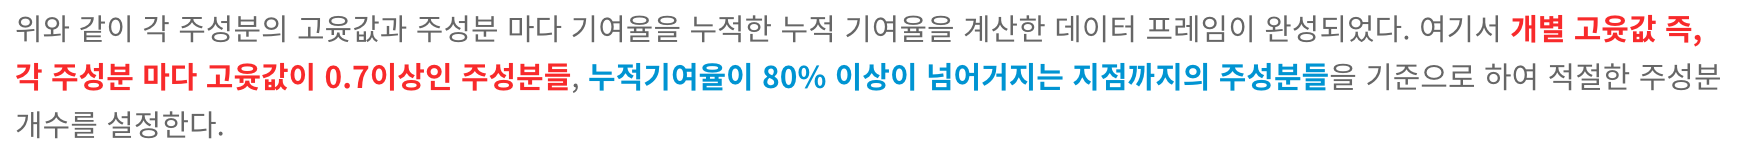

즉, 이 경우 2개의 주성분으로 PCA를 수행해주면 좋다.

In [ ]:
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df_pca)
pca_df = pd.DataFrame(pca_array, index=df_pca.index,
                       columns=[f"pca{num+1}"for num in range(pca.n_components)])
pca_df.head()

,pca1,pca2
0,-0.967327,-0.367508
1,-0.981791,-0.705789
2,1.044246,-0.161671
3,-0.963754,-0.297042
4,0.014565,-0.807578


In [ ]:
pca_df['Rings'] = df['Rings']

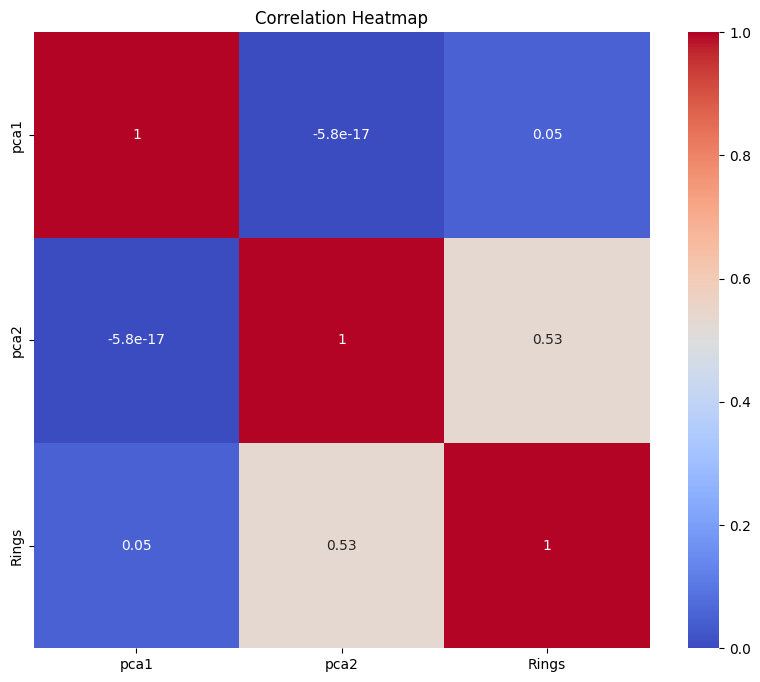

In [ ]:
# Heatmap

# 상관관계 계산
features = pca_df
correlation_matrix = features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
reg_minmax_pca = pca_df

In [ ]:
# 데이터 저장 reg_minmax_pca

reg_minmax_pca.to_csv('reg_minmax_pca.csv', index=False)